# Unit 5 - Financial Planning

In [630]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [631]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [632]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [633]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [634]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31614.00
The current value of your 5.3 ETH is $8437.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [635]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [636]:
# Set Alpaca API key and secret
ALPACA_API_KEY = #Removed key at the end
ALPACA_SECRET_KEY = #Removed key at the end

# Create the Alpaca API object
alpaca = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, api_version="v2")

In [637]:
# Format current date as ISO format
today = pd.Timestamp("2023-09-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(tickers, timeframe).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, join='inner')

# Preview DataFrame
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,,,,,,,
2023-09-25 04:00:00+00:00,94.49,94.6175,94.46,94.54,2579691,11337,94.53113,429.17,432.02,428.72,431.54,35359698,294579,430.405736


In [638]:
# Pick AGG and SPY close prices
agg_close_price = AGG['close'].iloc[0]
spy_close_price = SPY['close'].iloc[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.54
Current SPY closing price: $431.54


In [639]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

# Calculate total savings
total_portfolio_value = my_btc_value + my_eth_value + agg_close_price + spy_close_price

The current value of your 50 SPY shares is $21577.00
The current value of your 200 AGG shares is $18908.00


### Savings Health Analysis

In [640]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value

# Create savings DataFrame
data = {'amount': [crypto_value, shares_value]}
index = ['crypto', 'shares']
df_savings = pd.DataFrame(data, index=index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,40051.706
shares,40485.000


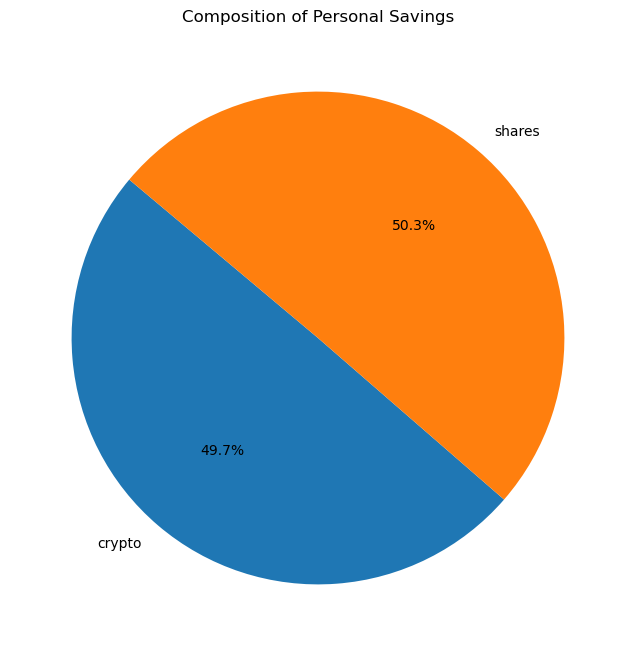

In [641]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot savings pie chart
df_savings.plot.pie(y='amount', figsize=(8, 8), autopct='%1.1f%%', startangle=140, legend=False)
plt.title('Composition of Personal Savings')
plt.ylabel('')
plt.show()

In [642]:
# Set ideal emergency fund
emergency_fund_value = monthly_income * 3

# Validate saving health
if total_portfolio_value > emergency_fund_value:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_portfolio_value == emergency_fund_value:
    print("Congratulations! You have reached this important financial goal.")
else:
    shortfall = emergency_fund_value - total_portfolio_value
    print(f"You are ${shortfall:.2f} away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [643]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-09-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-09-22', tz='America/New_York').isoformat()

In [644]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2018-09-24 04:00:00+00:00  105.33  105.46  105.3101  105.36  1895105   
2018-09-25 04:00:00+00:00  105.25  105.31  105.1800  105.31  2059394   
2018-09-26 04:00:00+00:00  105.37  105.60  105.3350  105.56  2912060   
2018-09-27 04:00:00+00:00  105.50  105.64  105.5000  105.63  2528233   
2018-09-28 04:00:00+00:00  105.69  105.71  105.5100  105.52  4883958   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-09-24 04:00:00+00:00        8343  105.378141  291.41  291.50  290.3700   
2018-09-25 04:00:00+00:00        8978  105.250925  291.53  291.65  290.4833   
2018-09-26 04:00:00+00:00       10663  105.466971  290.91  292.24  289.4100   
2018-09-27 04:00:00+00:00       10665  105.573432  290.41  291.91  290.1000   
2018-09-28 04:00:00+00:00       15703  105.582785  289.99  291.28  289.9500   

                                                                      
                             close    volume trade_count        vwap  
timestamp                                                             
2018-09-24 04:00:00+00:00  291.080  54024894      233335  291.001935  
2018-09-25 04:00:00+00:00  290.700  44471638      175808  290.968864  
2018-09-26 04:00:00+00:00  289.805  79789674      298739  290.681216  
2018-09-27 04:00:00+00:00  290.680  59472319      238702  290.901482  
2018-09-28 04:00:00+00:00  290.570  70091460      267815  290.599861

In [645]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [646]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2018-09-24 04:00:00+00:00  105.33  105.46  105.3101  105.36  1895105   
2018-09-25 04:00:00+00:00  105.25  105.31  105.1800  105.31  2059394   
2018-09-26 04:00:00+00:00  105.37  105.60  105.3350  105.56  2912060   
2018-09-27 04:00:00+00:00  105.50  105.64  105.5000  105.63  2528233   
2018-09-28 04:00:00+00:00  105.69  105.71  105.5100  105.52  4883958   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-09-24 04:00:00+00:00        8343  105.378141          NaN  291.41   
2018-09-25 04:00:00+00:00        8978  105.250925    -0.000475  291.53   
2018-09-26 04:00:00+00:00       10663  105.466971     0.002374  290.91   
2018-09-27 04:00:00+00:00       10665  105.573432     0.000663  290.41   
2018-09-28 04:00:00+00:00       15703  105.582785    -0.001041  289.99   

                                                                            \
                             high       low    close    volume trade_count   
timestamp                                                                    
2018-09-24 04:00:00+00:00  291.50  290.3700  291.080  54024894      233335   
2018-09-25 04:00:00+00:00  291.65  290.4833  290.700  44471638      175808   
2018-09-26 04:00:00+00:00  292.24  289.4100  289.805  79789674      298739   
2018-09-27 04:00:00+00:00  291.91  290.1000  290.680  59472319      238702   
2018-09-28 04:00:00+00:00  291.28  289.9500  290.570  70091460      267815   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-09-24 04:00:00+00:00  291.001935          NaN  
2018-09-25 04:00:00+00:00  290.968864    -0.001305  
2018-09-26 04:00:00+00:00  290.681216    -0.003079  
2018-09-27 04:00:00+00:00  290.901482     0.003019  
2018-09-28 04:00:00+00:00  290.599861    -0.000378

In [647]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 110.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 120.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 130.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 140.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 150.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 160.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 170.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 180.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 190.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 200.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 210.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 220.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 230.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 240.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 250.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 260.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 270.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 280.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 290.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 300.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 310.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 320.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 330.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 340.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 350.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 360.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 370.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 380.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 390.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 400.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 410.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 420.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 430.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 440.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 450.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 460.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 470.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 480.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

Running Monte Carlo simulation number 490.


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cu

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002956,1.009054,0.999845,1.012695,0.996027,0.996585,0.997695,0.995654,1.003240,1.003275,...,0.999355,1.011238,0.987652,1.010929,1.009571,0.991089,1.002426,1.005630,0.996613,0.990875
2,1.004424,0.994568,1.004585,1.002103,0.989361,1.005127,0.998141,0.993617,0.995839,1.006850,...,1.010158,1.031476,0.988503,1.008348,1.021783,0.986475,0.999366,1.005892,1.008926,0.982383
3,0.992332,0.987568,1.010776,1.005529,0.994924,1.006712,1.009584,1.000207,1.015162,1.001228,...,1.012644,1.043357,0.976027,1.009952,1.032883,0.992579,0.980258,0.986765,1.009147,0.980987
4,1.001362,0.990162,1.013684,1.009506,1.004990,1.016581,1.007827,1.007178,1.002239,0.994307,...,1.013704,1.047270,0.974669,1.019317,1.016808,0.987449,0.983692,0.994398,1.012348,0.975444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.324943,1.559417,5.467028,12.800143,5.234040,2.550325,3.302836,4.468791,1.960633,0.621957,...,12.468249,3.527817,9.234912,6.216960,4.968361,15.816863,3.629331,3.472084,4.769144,3.800832
7557,9.307701,1.590262,5.466007,12.836955,5.245956,2.550298,3.332125,4.473384,1.953017,0.620661,...,12.450071,3.571326,9.291073,6.232794,5.000014,15.612644,3.625143,3.416411,4.832009,3.833585
7558,9.338424,1.615760,5.498873,12.724132,5.216377,2.597249,3.336486,4.499028,1.922413,0.623142,...,12.517904,3.589004,9.233038,6.283811,5.029565,15.563193,3.655099,3.419210,4.941072,3.878708
7559,9.336982,1.614453,5.498010,12.615114,5.245487,2.584359,3.320984,4.475657,1.908549,0.625170,...,12.705360,3.571886,9.330942,6.274715,5.005836,15.565191,3.608982,3.373737,4.904171,3.845328


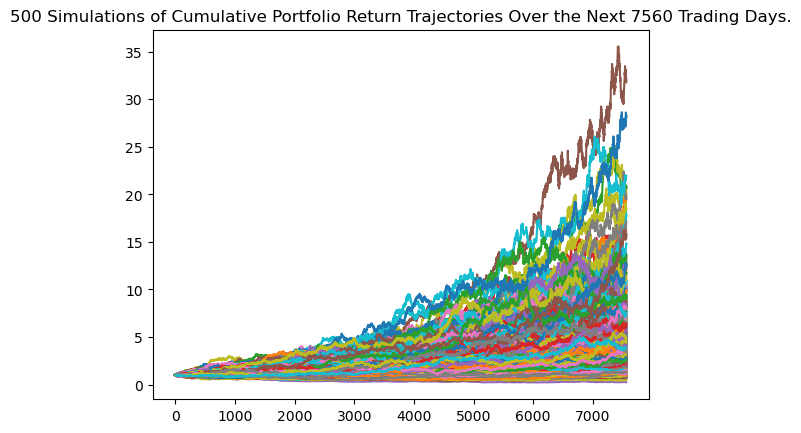

In [648]:
# Plot simulation outcomes
Line_plot = MC_thirty_year.plot_simulation()

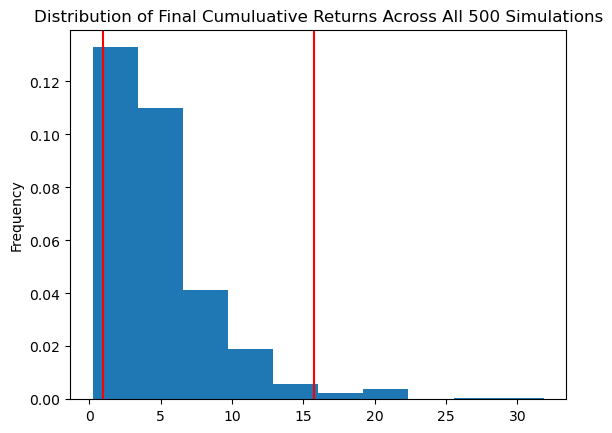

In [649]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [650]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.054663
std               3.987387
min               0.250972
25%               2.467423
50%               3.901185
75%               6.398938
max              31.849148
95% CI Lower      0.954220
95% CI Upper     15.746602
Name: 7560, dtype: float64


/Users/jangutt/Desktop/Desktop - Jan’s MacBook Pro/Dev/Fintech Bootcamp/Homework/Module 5 Homework/Homework Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [659]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19084.4 and $314932.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [660]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28626.6 and $472398.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [653]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [654]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [655]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [656]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [657]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [658]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


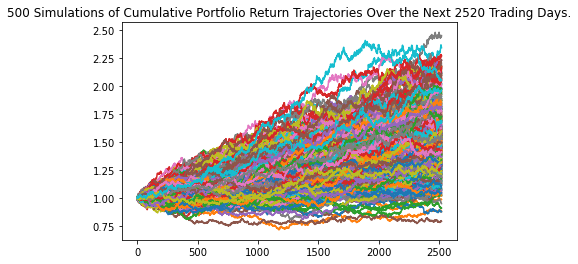

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

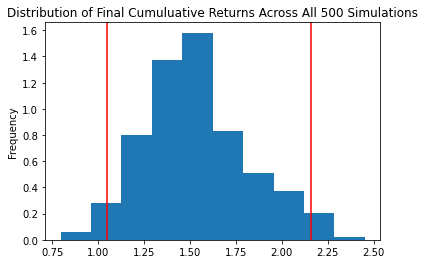

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
